## Final Project Submission

Please fill out:
* Student name: Christopher Freyre
* Student pace: part time
* Scheduled project review date/time: 11 September 2022
* Instructor name: Hardik Idnani
* Blog post URL: https://github.com/ChrisFreyre/dsc-phase-1-project


In [1]:
# IMPORTING LIBRAIRIES
import csv
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt

## Clean Datasets:

### Movie Titles data:

In [2]:
!ls

Genre-mean_top_studios.png graph_genre.csv
Microsoft_data.csv         imdb.title.basics.csv.gz
README.md                  imdb.title.ratings.csv.gz
bom.movie_gross.csv.gz     student.ipynb
df_final_raiting.csv       studios_domestic_gross.csv
first_recomendation.png    zippedData
genres_raiting_mean.csv


In [3]:
# IMPORT MOVIE TITLES DATA
df_title = pd.read_csv('imdb.title.basics.csv.gz')

In [4]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
df_title

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [6]:
# DROP COLUMN WE DON'T NEED 
df_title.drop(columns = ['runtime_minutes', 'original_title'], inplace = True)

In [7]:
#DROP ALL DUPLICATES IN COLUMN 
df_title.drop_duplicates(subset="primary_title", keep='first', inplace=True)
df_title

,tconst,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,tt9916706,Dankyavar Danka,2013,Comedy
146142,tt9916730,6 Gunn,2017,NaN


### Ratings data:

In [8]:
!ls

Genre-mean_top_studios.png graph_genre.csv
Microsoft_data.csv         imdb.title.basics.csv.gz
README.md                  imdb.title.ratings.csv.gz
bom.movie_gross.csv.gz     student.ipynb
df_final_raiting.csv       studios_domestic_gross.csv
first_recomendation.png    zippedData
genres_raiting_mean.csv


In [9]:
# IMPORT MOVIE RATINGS DATA
df_ratings = pd.read_csv('imdb.title.ratings.csv.gz')

In [10]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [11]:
df_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [12]:
# DROP COLUMN WE DON'T NEED 
df_ratings.drop(columns = ['numvotes'], inplace = True)

In [13]:
df_ratings

,tconst,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5
...,...,...
73851,tt9805820,8.1
73852,tt9844256,7.5
73853,tt9851050,4.7
73854,tt9886934,7.0


### Movie Gross data:

In [14]:
!ls

Genre-mean_top_studios.png graph_genre.csv
Microsoft_data.csv         imdb.title.basics.csv.gz
README.md                  imdb.title.ratings.csv.gz
bom.movie_gross.csv.gz     student.ipynb
df_final_raiting.csv       studios_domestic_gross.csv
first_recomendation.png    zippedData
genres_raiting_mean.csv


In [15]:
# IMPORT MOVIE GROSS DATA
df_moive_gross = pd.read_csv('bom.movie_gross.csv.gz')

In [16]:
df_moive_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [17]:
df_moive_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [18]:
# DROP COLUMN WE DON'T NEED 
df_moive_gross.drop(columns = ['foreign_gross'], inplace = True)

In [19]:
#DROP ALL DUPLICATES IN COLUMN 
df_moive_gross.drop_duplicates(subset="title", keep='first', inplace=True)
df_moive_gross

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [20]:
# REPLACE NAME OF THE COLUMN TITLE TO PRIMARY_TITLE

df_moive_gross=df_moive_gross.rename(columns = {'title':'primary_title'})
df_moive_gross

,primary_title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


### Merge Datas sets:

In [21]:
# MERGE DATA FRAME DF_GROSS_MOVIES1 WITH RATING1 BY TCONST
df_title_rating = pd.merge(df_title,df_ratings, on = "tconst")
df_title_rating

,tconst,primary_title,start_year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5
...,...,...,...,...,...
68822,tt9911774,Padmavyuhathile Abhimanyu,2019,Drama,8.4
68823,tt9913056,Swarm Season,2019,Documentary,6.2
68824,tt9913084,Diabolik sono io,2019,Documentary,6.2
68825,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.7


In [22]:
# MERGE DATAFRAME MOVIES2 WITH GROSS2 BY PRIMARY TITLE
big_df = pd.merge(df_title_rating,df_moive_gross, on = "primary_title")
big_df

,tconst,primary_title,start_year,genres,averagerating,studio,domestic_gross,year
0,tt0315642,Wazir,2016,"Action,Crime,Drama",7.1,Relbig.,1100000.0,2016
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,IFC,744000.0,2012
2,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,Fox,58200000.0,2013
3,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,Uni.,26300000.0,2014
4,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,Uni.,652300000.0,2015
...,...,...,...,...,...,...,...,...
2544,tt8331988,The Chambermaid,2018,Drama,7.1,FM,300.0,2015
2545,tt8404272,How Long Will I Love U,2018,Romance,6.5,WGUSA,747000.0,2018
2546,tt8427036,Helicopter Eela,2018,Drama,5.4,Eros,72000.0,2018
2547,tt9078374,Last Letter,2018,"Drama,Romance",6.4,CL,181000.0,2018


In [23]:
big_df.columns

Index(['tconst', 'primary_title', 'start_year', 'genres', 'averagerating',
       'studio', 'domestic_gross', 'year'],
      dtype='object')

In [24]:
# SAVING DATAFRAME AS CSV FILE 

big_df.to_csv('/Users/christopherfreyre/Documents/Academy Xi/Microsoft_project/dsc-phase-1-project/Microsoft_data.csv', index=False)
              
              

# 1st. recomendation:
### Find top 5 movie studios in relation to Domestic Gross

In [25]:
# IMPORTIN MAIN DATAFRAME

microsoft_data = pd.read_csv('Microsoft_data.csv')


In [26]:
# CHECK COLUMNS
microsoft_data.columns

Index(['tconst', 'primary_title', 'start_year', 'genres', 'averagerating',
       'studio', 'domestic_gross', 'year'],
      dtype='object')

In [27]:
# HOW MANY YEARS OF DATA 
set(microsoft_data['year'])

{2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018}

In [28]:
# ADD VARIABLE STUDIOS AND CORRELATED COLUMNS
studios = microsoft_data.loc[:, ['studio', 'domestic_gross', 'year']]

In [29]:
studios

,studio,domestic_gross,year
0,Relbig.,1100000.0,2016
1,IFC,744000.0,2012
2,Fox,58200000.0,2013
3,Uni.,26300000.0,2014
4,Uni.,652300000.0,2015
...,...,...,...
2544,FM,300.0,2015
2545,WGUSA,747000.0,2018
2546,Eros,72000.0,2018
2547,CL,181000.0,2018


In [30]:
# CHECK FOR NAN CELLS
studios.isna().sum()

studio             3
domestic_gross    17
year               0
dtype: int64

In [31]:
# DROPPIN ALL NA SPACES

studios.dropna(inplace=True)

In [32]:
studios

,studio,domestic_gross,year
0,Relbig.,1100000.0,2016
1,IFC,744000.0,2012
2,Fox,58200000.0,2013
3,Uni.,26300000.0,2014
4,Uni.,652300000.0,2015
...,...,...,...
2544,FM,300.0,2015
2545,WGUSA,747000.0,2018
2546,Eros,72000.0,2018
2547,CL,181000.0,2018


In [33]:
#CROSSTAB STUDIOS YEAR WITH DOMESTIC GROSS

studios_gross_total = pd.crosstab(studios.studio,studios.year, values = studios.domestic_gross,
                     aggfunc = 'sum', margins = True, margins_name = 'Total').fillna(0)


In [34]:
studios_gross_total

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
studio,,,,,,,,,,
3D,6.100000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.100000e+06
A23,0.000000e+00,1.510000e+05,0.000000e+00,1.320000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.642000e+05
A24,0.000000e+00,0.000000e+00,0.000000e+00,2.784540e+07,1.638830e+07,5.127510e+07,3.916800e+07,8.140570e+07,4.584800e+07,2.619305e+08
ADC,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.280000e+05,0.000000e+00,2.020000e+04,0.000000e+00,2.482000e+05
AF,0.000000e+00,0.000000e+00,1.000000e+06,7.690000e+04,5.580000e+05,3.530000e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.987900e+06
...,...,...,...,...,...,...,...,...,...,...
XL,0.000000e+00,0.000000e+00,0.000000e+00,1.170000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.170000e+05
Yash,4.380000e+04,4.960000e+05,5.352600e+06,8.000000e+06,0.000000e+00,1.800000e+06,8.500000e+06,6.530000e+06,0.000000e+00,3.072240e+07
Zee,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+06,0.000000e+00,0.000000e+00,1.100000e+06


In [35]:
#SAVING DATAFRAME OF TOTAL DOMESTIC GROSS FOR EACH STUDIO FROM 2010-2018  AS CSV FILE 

studios_gross_total.to_csv('/Users/christopherfreyre/Documents/Academy Xi/Microsoft_project/dsc-phase-1-project/studios_domestic_gross.csv')



In [36]:
#BRINGIN BACK DATAFRAME FROM FOLDER

studio_domestic_gross =  pd.read_csv('/Users/christopherfreyre/Documents/Academy Xi/Microsoft_project/dsc-phase-1-project/studios_domestic_gross.csv')



In [37]:
studio_domestic_gross

,studio,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
0,3D,6.100000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.100000e+06
1,A23,0.000000e+00,1.510000e+05,0.000000e+00,1.320000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.642000e+05
2,A24,0.000000e+00,0.000000e+00,0.000000e+00,2.784540e+07,1.638830e+07,5.127510e+07,3.916800e+07,8.140570e+07,4.584800e+07,2.619305e+08
3,ADC,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.280000e+05,0.000000e+00,2.020000e+04,0.000000e+00,2.482000e+05
4,AF,0.000000e+00,0.000000e+00,1.000000e+06,7.690000e+04,5.580000e+05,3.530000e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.987900e+06
...,...,...,...,...,...,...,...,...,...,...,...
207,XL,0.000000e+00,0.000000e+00,0.000000e+00,1.170000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.170000e+05
208,Yash,4.380000e+04,4.960000e+05,5.352600e+06,8.000000e+06,0.000000e+00,1.800000e+06,8.500000e+06,6.530000e+06,0.000000e+00,3.072240e+07
209,Zee,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+06,0.000000e+00,0.000000e+00,1.100000e+06
210,Zeit.,0.000000e+00,7.120000e+04,3.170000e+05,7.850000e+05,5.047000e+05,2.290000e+04,1.170000e+04,0.000000e+00,0.000000e+00,1.712500e+06


In [38]:
# JUST COLECTING ALL ROWS WITH EXEXCEPTION FOR TOTAL ROW, FOR ALL COLUMNS

total_studios = studio_domestic_gross.loc[:210, :]

# CREATING A DATASET FOR TOP 5 STUDIOS
top5_studios = total_studios.sort_values('Total', ascending = False).head(5)
top5_studios

,studio,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
30,BV,950900000.0,9.850000e+08,8.298000e+08,1.581500e+09,1.519600e+09,1.357800e+09,2.430800e+09,1.664500e+09,2.946400e+09,1.426630e+10
193,Uni.,872900000.0,9.394000e+08,8.733000e+08,1.395800e+09,8.388000e+08,2.384338e+09,1.378000e+09,1.363300e+09,1.107222e+09,1.115306e+10
78,Fox,756300000.0,1.005300e+09,9.122000e+08,9.862000e+08,1.555400e+09,1.192000e+09,1.441900e+09,9.700000e+08,7.074000e+08,9.526700e+09
201,WB,989800000.0,1.135300e+09,1.180100e+09,9.254000e+08,7.368000e+08,6.348000e+08,1.149200e+09,1.214300e+09,1.340600e+09,9.306300e+09
176,Sony,918599999.0,7.010000e+08,1.197700e+09,7.153000e+08,6.126000e+08,6.955110e+08,3.391955e+08,9.972415e+08,4.853900e+08,6.662538e+09


In [39]:
# TOP 5 STUDIOS WITH ONLY SUTDIO AND TOTAL COULMNS

df_top5 = top5_studios.loc[:, ['studio', 'Total']]
df_top5

,studio,Total
30,BV,1.426630e+10
193,Uni.,1.115306e+10
78,Fox,9.526700e+09
201,WB,9.306300e+09
176,Sony,6.662538e+09


In [40]:
#CONVERTING DATASET INTO A LIST OF DICTS

data = top5_studios.set_index('studio').to_dict()['Total']
data

{'BV': 14266299999.0,
 'Uni.': 11153060000.0,
 'Fox': 9526699998.0,
 'WB': 9306300000.0,
 'Sony': 6662537998.0}

In [41]:
#ADDING VARIABLES TO INDIVIDUAL KEYS AND VALUES TO PLOT IN GRAPH LATER

group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

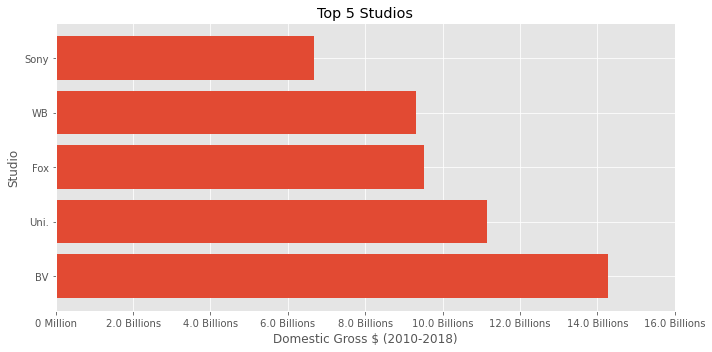

In [42]:
#PLOTING GRAPH RELATED TO STUDIOS DOMESTIC GROSS PERFOMANCE IN PERIOD 2010-2018


def format_number(group_data, indx):
    if group_data >= 1_000_000_000:
        formatter = '{:1.1f} Billions'.format(group_data*0.000000001)
    else: 
        formatter = '{:1.0f} Million'.format(group_data*0.0000001)
    return formatter

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(group_names, group_data)

step_value = 2_000_000_000

plt.xticks(np.arange(0, max(group_data)+ step_value, step_value))


ax.set(xlabel='Domestic Gross $ (2010-2018)', ylabel='Studio',
       title='Top 5 Studios')


ax.xaxis.set_major_formatter(format_number)

plt.tight_layout()
plt.savefig("first_recomendation.png")
plt.show()


In [43]:
# CHANGING FORMAT FOR DIGITS IN DOMESTIC_GROSS

df_top5['Total'] = total_studios.apply(lambda x: "{:,}".format(x['Total']), axis=1)
df_top5

,studio,Total
30,BV,"14,266,299,999.0"
193,Uni.,"11,153,060,000.0"
78,Fox,"9,526,699,998.0"
201,WB,"9,306,300,000.0"
176,Sony,"6,662,537,998.0"


# 2nd. Recomendation:

### Here we use the top 5 Movie Studios to find the genres with the biggest domestic gross and mean domestic gross

In [44]:
!ls

Genre-mean_top_studios.png graph_genre.csv
Microsoft_data.csv         imdb.title.basics.csv.gz
README.md                  imdb.title.ratings.csv.gz
bom.movie_gross.csv.gz     student.ipynb
df_final_raiting.csv       studios_domestic_gross.csv
first_recomendation.png    zippedData
genres_raiting_mean.csv


In [45]:
#IMPORTING MAIN DATA FRAME 

microsoft_data2 = pd.read_csv("/Users/christopherfreyre/Documents/Academy Xi/Microsoft_project/dsc-phase-1-project/Microsoft_data.csv")
microsoft_data2


,tconst,primary_title,start_year,genres,averagerating,studio,domestic_gross,year
0,tt0315642,Wazir,2016,"Action,Crime,Drama",7.1,Relbig.,1100000.0,2016
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,IFC,744000.0,2012
2,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,Fox,58200000.0,2013
3,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,Uni.,26300000.0,2014
4,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,Uni.,652300000.0,2015
...,...,...,...,...,...,...,...,...
2544,tt8331988,The Chambermaid,2018,Drama,7.1,FM,300.0,2015
2545,tt8404272,How Long Will I Love U,2018,Romance,6.5,WGUSA,747000.0,2018
2546,tt8427036,Helicopter Eela,2018,Drama,5.4,Eros,72000.0,2018
2547,tt9078374,Last Letter,2018,"Drama,Romance",6.4,CL,181000.0,2018


In [46]:
microsoft_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549 entries, 0 to 2548
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          2549 non-null   object 
 1   primary_title   2549 non-null   object 
 2   start_year      2549 non-null   int64  
 3   genres          2548 non-null   object 
 4   averagerating   2549 non-null   float64
 5   studio          2546 non-null   object 
 6   domestic_gross  2532 non-null   float64
 7   year            2549 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 159.4+ KB


In [47]:
# COLUMNS IN DATA

microsoft_data2.columns

Index(['tconst', 'primary_title', 'start_year', 'genres', 'averagerating',
       'studio', 'domestic_gross', 'year'],
      dtype='object')

In [48]:
#REDUCTION OF COLUMNS NO NEEDED IN DATAFRAME FOR TOP 5 MOVIE STUDIOS
data_genres = microsoft_data2.loc[:, ['primary_title', 'genres', 'studio', 'domestic_gross', 'year'
                      ]].sort_values('domestic_gross', ascending = False)
data_genres

,primary_title,genres,studio,domestic_gross,year
1035,Black Panther,"Action,Adventure,Sci-Fi",BV,700100000.0,2018
2094,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,678800000.0,2018
4,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,652300000.0,2015
1602,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,620200000.0,2017
1943,Incredibles 2,"Action,Adventure,Animation",BV,608600000.0,2018
...,...,...,...,...,...
1204,Force,"Action,Thriller",FoxS,NaN,2011
1329,Keith Lemon: The Film,Comedy,NaN,NaN,2012
1445,Jessabelle,"Horror,Thriller",LGF,NaN,2014
1631,Viral,"Comedy,Horror,Thriller",W/Dim.,NaN,2016


In [49]:
# CHECKING HOW MANY NA ARE IN THE DATA

data_genres.isnull().sum(axis = 0)

primary_title      0
genres             1
studio             3
domestic_gross    17
year               0
dtype: int64

In [50]:
# DROP NA FROM DOMESTIC GROSS

data_genres.dropna(subset=['domestic_gross'], inplace = True)
data_genres

,primary_title,genres,studio,domestic_gross,year
1035,Black Panther,"Action,Adventure,Sci-Fi",BV,700100000.0,2018
2094,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,678800000.0,2018
4,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,652300000.0,2015
1602,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,620200000.0,2017
1943,Incredibles 2,"Action,Adventure,Animation",BV,608600000.0,2018
...,...,...,...,...,...
207,2:22,Thriller,Magn.,400.0,2017
967,Apartment 143,"Horror,Thriller",Magn.,400.0,2012
2223,Satanic,Horror,Magn.,300.0,2016
2544,The Chambermaid,Drama,FM,300.0,2015


In [51]:
#TOP 5 STUDIOS WITH ALL THEIR MOVIES

top_studios_genre = data_genres[data_genres['studio'].isin (['BV', 'Uni.', 'Fox', 'WB', 'Sony'])]
top_studios_genre

,primary_title,genres,studio,domestic_gross,year
1035,Black Panther,"Action,Adventure,Sci-Fi",BV,700100000.0,2018
2094,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,678800000.0,2018
4,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,652300000.0,2015
1602,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,620200000.0,2017
1943,Incredibles 2,"Action,Adventure,Animation",BV,608600000.0,2018
...,...,...,...,...,...
2340,League of Gods,"Action,Fantasy",Sony,182000.0,2016
2449,Poster Boys,Comedy,Sony,97000.0,2017
2197,Loving Pablo,"Action,Biography,Crime",Uni.,22000.0,2018
2315,The Duelist,"Action,Drama,Thriller",Sony,13500.0,2016


In [52]:
#SPLITING GENRES INTO NEW COLUMNS

top_studios_genre[['genre_1', 'genre_2', 'genre_3']] = top_studios_genre['genres'].str.split(',' ,expand=True)
top_studios_genre

/Users/christopherfreyre/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,primary_title,genres,studio,domestic_gross,year,genre_1,genre_2,genre_3
1035,Black Panther,"Action,Adventure,Sci-Fi",BV,700100000.0,2018,Action,Adventure,Sci-Fi
2094,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,678800000.0,2018,Action,Adventure,Sci-Fi
4,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,652300000.0,2015,Action,Adventure,Sci-Fi
1602,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,620200000.0,2017,Action,Adventure,Fantasy
1943,Incredibles 2,"Action,Adventure,Animation",BV,608600000.0,2018,Action,Adventure,Animation
...,...,...,...,...,...,...,...,...
2340,League of Gods,"Action,Fantasy",Sony,182000.0,2016,Action,Fantasy,None
2449,Poster Boys,Comedy,Sony,97000.0,2017,Comedy,None,None
2197,Loving Pablo,"Action,Biography,Crime",Uni.,22000.0,2018,Action,Biography,Crime
2315,The Duelist,"Action,Drama,Thriller",Sony,13500.0,2016,Action,Drama,Thriller


In [53]:
#DROPPING GENRES OLD COLUMN AS NO NEEDED

top_studios_genre.drop(columns = ['genres'], inplace = True)
top_studios_genre

/Users/christopherfreyre/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,primary_title,studio,domestic_gross,year,genre_1,genre_2,genre_3
1035,Black Panther,BV,700100000.0,2018,Action,Adventure,Sci-Fi
2094,Avengers: Infinity War,BV,678800000.0,2018,Action,Adventure,Sci-Fi
4,Jurassic World,Uni.,652300000.0,2015,Action,Adventure,Sci-Fi
1602,Star Wars: The Last Jedi,BV,620200000.0,2017,Action,Adventure,Fantasy
1943,Incredibles 2,BV,608600000.0,2018,Action,Adventure,Animation
...,...,...,...,...,...,...,...
2340,League of Gods,Sony,182000.0,2016,Action,Fantasy,None
2449,Poster Boys,Sony,97000.0,2017,Comedy,None,None
2197,Loving Pablo,Uni.,22000.0,2018,Action,Biography,Crime
2315,The Duelist,Sony,13500.0,2016,Action,Drama,Thriller


In [54]:
#INDIVIDUALIZED AMOUNT OF GENRES AND COUNT THEM

number_genres = top_studios_genre[['genre_1','genre_2', 'genre_3']].stack().value_counts()
number_genres

Comedy         224
Adventure      197
Action         194
Drama          177
Thriller        74
Animation       66
Crime           64
Fantasy         55
Romance         53
Family          52
Sci-Fi          52
Biography       39
Horror          30
Mystery         29
History         15
Music           11
Sport           11
Documentary      8
War              4
Musical          2
Western          2
dtype: int64

In [55]:
# CONVET INTO DICT

number_genres = number_genres.to_dict()

In [56]:
# CONVERT INTO DATA FRAME

number_genres = pd.DataFrame.from_dict(number_genres, orient = 'index')
number_genres

,0
Comedy,224
Adventure,197
Action,194
Drama,177
Thriller,74
Animation,66
Crime,64
Fantasy,55
Romance,53
Family,52


In [57]:
#RESET THE INDEX OF THE DATAFRAME

number_genres = number_genres.reset_index()
number_genres

,index,0
0,Comedy,224
1,Adventure,197
2,Action,194
3,Drama,177
4,Thriller,74
5,Animation,66
6,Crime,64
7,Fantasy,55
8,Romance,53
9,Family,52


In [58]:
# RENAMEING COLUMNS FOR A FUTURE MERGE 
number_genres.columns = ['genres', 'no_movies']

In [59]:
#MELTING ALL GENRES WITH THE TOTAL OF THEIR DOMESTIC GROSS

top_genre = pd.melt(top_studios_genre, id_vars = ["domestic_gross"], value_name = "genres", value_vars= ["genre_1",
                        "genre_2", "genre_3"])
top_genre = top_genre.drop("variable", axis = 1).groupby("genres").sum().reset_index()

In [60]:
#DOMESTIC GROSS IN RELATION TO THE GENRES 

top_genre

,genres,domestic_gross
0,Action,2.641882e+10
1,Adventure,2.964059e+10
2,Animation,1.011850e+10
3,Biography,2.938212e+09
4,Comedy,2.122164e+10
5,Crime,5.039122e+09
6,Documentary,1.702055e+08
7,Drama,1.154825e+10
8,Family,4.022700e+09
9,Fantasy,5.957162e+09


In [61]:
#MERGING DATAFRAMES FROM GENRES COLUMN SO WE CAN SEE OUR MEAN IN GENRES
genre_mean = pd.merge(top_genre,number_genres, on = "genres")
genre_mean

,genres,domestic_gross,no_movies
0,Action,2.641882e+10,194
1,Adventure,2.964059e+10,197
2,Animation,1.011850e+10,66
3,Biography,2.938212e+09,39
4,Comedy,2.122164e+10,224
5,Crime,5.039122e+09,64
6,Documentary,1.702055e+08,8
7,Drama,1.154825e+10,177
8,Family,4.022700e+09,52
9,Fantasy,5.957162e+09,55


In [62]:
#TOP 10 GENRES IN TERMS OF DOMESTIC GROSS

genre_gross10 = genre_mean.nlargest(n=10, columns=['domestic_gross']).reset_index(drop=True)
genre_gross10.index = genre_gross10.index + 1
genre_gross10

,genres,domestic_gross,no_movies
1,Adventure,2.964059e+10,197
2,Action,2.641882e+10,194
3,Comedy,2.122164e+10,224
4,Drama,1.154825e+10,177
5,Animation,1.011850e+10,66
6,Sci-Fi,9.683600e+09,52
7,Thriller,6.321614e+09,74
8,Fantasy,5.957162e+09,55
9,Crime,5.039122e+09,64
10,Family,4.022700e+09,52


In [63]:
#GENRE MEAN IN RELATION TO DOMESTIC GROSS 
genre_mean = (genre_mean.assign(mean = lambda x: x.domestic_gross / x.no_movies))

In [64]:
#TOP 10 MEAN GENRE IN RELATION TO DOMESTIC GROSS
top10_mean = genre_mean.sort_values(by=['mean'], ascending = False).head(10)

In [65]:
#FINAL TOP 10 FOR GENRES CORELATED TO THE MEAN OF DOMESTIC GROSS IN RELATION OF THE NUMBER OF MOVIES.
graph_genre = top10_mean.reset_index(drop=True)
graph_genre.index = graph_genre.index + 1
graph_genre

,genres,domestic_gross,no_movies,mean
1,Sci-Fi,9.683600e+09,52,1.862231e+08
2,Animation,1.011850e+10,66,1.533106e+08
3,Adventure,2.964059e+10,197,1.504599e+08
4,Musical,2.949000e+08,2,1.474500e+08
5,Action,2.641882e+10,194,1.361795e+08
6,Fantasy,5.957162e+09,55,1.083120e+08
7,Comedy,2.122164e+10,224,9.473945e+07
8,Thriller,6.321614e+09,74,8.542721e+07
9,Music,8.726000e+08,11,7.932727e+07
10,Crime,5.039122e+09,64,7.873628e+07


## Results for genre in relation to top 5 studios

### 1. Domestic Gross in relation to top 10 genres of the top 5 movie studios

In [66]:
#TOP 10 GENRES IN RELATION TO TOTAL DOMESTIC GROSS IN PERIOD 2010-2018.

#Changing str into float values in column domestic_gross 
genre_gross10['domestic_gross'] = genre_gross10['domestic_gross'].astype('float')

#Changing taking e+ off the values in domestic_gross and add a comma 
genre_gross10.loc[:, "domestic_gross"] = genre_gross10["domestic_gross"].map('{:,.0f}'.format)
genre_gross10

,genres,domestic_gross,no_movies
1,Adventure,"29,640,590,998",197
2,Action,"26,418,817,499",194
3,Comedy,"21,221,635,996",224
4,Drama,"11,548,252,500",177
5,Animation,"10,118,499,998",66
6,Sci-Fi,"9,683,600,000",52
7,Thriller,"6,321,613,500",74
8,Fantasy,"5,957,162,000",55
9,Crime,"5,039,122,000",64
10,Family,"4,022,700,000",52


# First Graph

## Top 10 Genres 

### Highlighting the top genres of the top 5 Studios in relation to the total of domestic gross in the period 2010-2018 



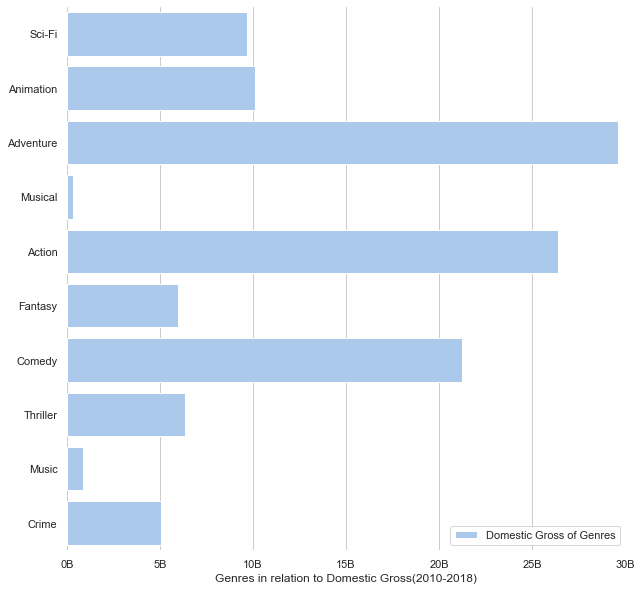

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
import matplotlib.ticker as ticker




# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))





sns.set_color_codes("pastel")
sns.barplot(x="domestic_gross", y="genres", data=graph_genre,
            label="Domestic Gross of Genres", color="b")




# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 30_000_000_000), ylabel="",
       xlabel="Genres in relation to Domestic Gross(2010-2018)")
sns.despine(left=True, bottom=True)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1_000_000_000) + 'B'))



In [68]:
genre_gross10

,genres,domestic_gross,no_movies
1,Adventure,"29,640,590,998",197
2,Action,"26,418,817,499",194
3,Comedy,"21,221,635,996",224
4,Drama,"11,548,252,500",177
5,Animation,"10,118,499,998",66
6,Sci-Fi,"9,683,600,000",52
7,Thriller,"6,321,613,500",74
8,Fantasy,"5,957,162,000",55
9,Crime,"5,039,122,000",64
10,Family,"4,022,700,000",52


## 2. Mean of the Domestic Gross in relation to top 10 genres



In [69]:
graph_genre

,genres,domestic_gross,no_movies,mean
1,Sci-Fi,9.683600e+09,52,1.862231e+08
2,Animation,1.011850e+10,66,1.533106e+08
3,Adventure,2.964059e+10,197,1.504599e+08
4,Musical,2.949000e+08,2,1.474500e+08
5,Action,2.641882e+10,194,1.361795e+08
6,Fantasy,5.957162e+09,55,1.083120e+08
7,Comedy,2.122164e+10,224,9.473945e+07
8,Thriller,6.321614e+09,74,8.542721e+07
9,Music,8.726000e+08,11,7.932727e+07
10,Crime,5.039122e+09,64,7.873628e+07


# Second Graph


## Top 10 Genres 

### Highlighting the top genres of the top 5 Studios in relation to the domestic gross mean in the period 2010-2018 



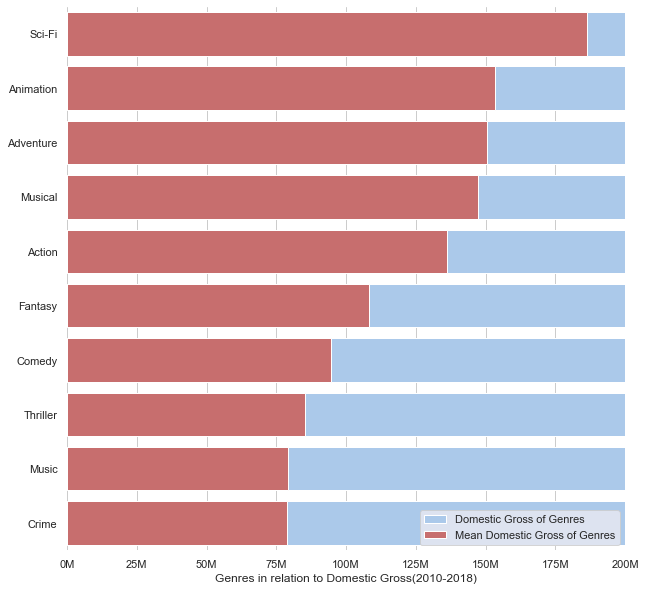

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")




# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))




sns.set(font_scale = 1)
sns.set_color_codes("pastel")
sns.barplot(x="domestic_gross", y="genres", data=graph_genre,
            label="Domestic Gross of Genres", color="b")


sns.set_color_codes("muted")
sns.barplot(x="mean", y="genres", data=graph_genre,
            label="Mean Domestic Gross of Genres", color="r")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 200_000_000), ylabel="",
       xlabel="Genres in relation to Domestic Gross(2010-2018)")
sns.despine(left=True, bottom=True)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1_000_000) + 'M'))


In [71]:
#TOP 10 GENRES IN RELATION TO TOTAL DOMESTIC GROSS MEAN IN PERIOD 2010-2018.

#Changing str into float values in column domestic_gross 
graph_genre['mean'] = graph_genre['mean'].astype('float')

#Changing taking e+ off the values in mean and add a comma 
graph_genre.loc[:, "mean"] = graph_genre["mean"].map('{:,.0f}'.format)
graph_genre.loc[:, "domestic_gross"] = graph_genre["domestic_gross"].map('{:,.0f}'.format)
graph_genre

,genres,domestic_gross,no_movies,mean
1,Sci-Fi,"9,683,600,000",52,"186,223,077"
2,Animation,"10,118,499,998",66,"153,310,606"
3,Adventure,"29,640,590,998",197,"150,459,853"
4,Musical,"294,900,000",2,"147,450,000"
5,Action,"26,418,817,499",194,"136,179,472"
6,Fantasy,"5,957,162,000",55,"108,312,036"
7,Comedy,"21,221,635,996",224,"94,739,446"
8,Thriller,"6,321,613,500",74,"85,427,209"
9,Music,"872,600,000",11,"79,327,273"
10,Crime,"5,039,122,000",64,"78,736,281"


# 3er. Recomendation:

### Here we use the top 5 Movie Studios to find the genres with the biggest ratings and mean ratings 

In [72]:
!ls

Genre-mean_top_studios.png graph_genre.csv
Microsoft_data.csv         imdb.title.basics.csv.gz
README.md                  imdb.title.ratings.csv.gz
bom.movie_gross.csv.gz     student.ipynb
df_final_raiting.csv       studios_domestic_gross.csv
first_recomendation.png    zippedData
genres_raiting_mean.csv


In [73]:
#IMPORTING MAIN DATA FRAME 

microsoft_data3 = pd.read_csv("/Users/christopherfreyre/Documents/Academy Xi/Microsoft_project/dsc-phase-1-project/Microsoft_data.csv")
microsoft_data3


,tconst,primary_title,start_year,genres,averagerating,studio,domestic_gross,year
0,tt0315642,Wazir,2016,"Action,Crime,Drama",7.1,Relbig.,1100000.0,2016
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,IFC,744000.0,2012
2,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,Fox,58200000.0,2013
3,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,Uni.,26300000.0,2014
4,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,Uni.,652300000.0,2015
...,...,...,...,...,...,...,...,...
2544,tt8331988,The Chambermaid,2018,Drama,7.1,FM,300.0,2015
2545,tt8404272,How Long Will I Love U,2018,Romance,6.5,WGUSA,747000.0,2018
2546,tt8427036,Helicopter Eela,2018,Drama,5.4,Eros,72000.0,2018
2547,tt9078374,Last Letter,2018,"Drama,Romance",6.4,CL,181000.0,2018


In [74]:
#TOP 5 STUDIOS WITH ALL THEIR MOVIES

ranking = microsoft_data3[microsoft_data3['studio'].isin (['BV', 'Uni.', 'Fox', 'WB', 'Sony'])]
ranking

,tconst,primary_title,start_year,genres,averagerating,studio,domestic_gross,year
2,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,Fox,58200000.0,2013
3,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,Uni.,26300000.0,2014
4,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,Uni.,652300000.0,2015
5,tt0372538,Spy,2011,"Action,Crime,Drama",6.6,Fox,110800000.0,2015
8,tt0383010,The Three Stooges,2012,"Comedy,Family",5.1,Fox,44300000.0,2012
...,...,...,...,...,...,...,...,...
2490,tt6966692,Green Book,2018,"Biography,Comedy,Drama",8.3,Uni.,85100000.0,2018
2500,tt7074886,The Front Runner,2018,"Biography,Drama,History",6.2,Sony,2000000.0,2018
2527,tt7690638,Soorma,2018,"Biography,Drama,Sport",7.4,Sony,390000.0,2018
2530,tt7752454,Detective Chinatown 2,2018,"Action,Comedy,Mystery",6.1,WB,2000000.0,2018


In [75]:
# LOC COLUMNS FOR RANKING
ranking1 = ranking.loc[:, ['genres', 'averagerating', 'year']].sort_values('averagerating', ascending = False)
ranking1

,genres,averagerating,year
427,"Action,Adventure,Sci-Fi",8.8,2010
1675,Documentary,8.7,2017
2094,"Action,Adventure,Sci-Fi",8.5,2018
2535,"Documentary,History,War",8.4,2018
407,"Action,Thriller",8.4,2012
...,...,...,...
1935,Drama,3.8,2016
847,Comedy,3.4,2010
80,Comedy,3.3,2011
2240,"Adventure,Animation,Comedy",3.2,2017


In [76]:
#SPLITING GENRES INTO NEW COLUMNS

ranking1[['genre_1', 'genre_2', 'genre_3']] = ranking1['genres'].str.split(',' ,expand=True)
ranking1

,genres,averagerating,year,genre_1,genre_2,genre_3
427,"Action,Adventure,Sci-Fi",8.8,2010,Action,Adventure,Sci-Fi
1675,Documentary,8.7,2017,Documentary,None,None
2094,"Action,Adventure,Sci-Fi",8.5,2018,Action,Adventure,Sci-Fi
2535,"Documentary,History,War",8.4,2018,Documentary,History,War
407,"Action,Thriller",8.4,2012,Action,Thriller,None
...,...,...,...,...,...,...
1935,Drama,3.8,2016,Drama,None,None
847,Comedy,3.4,2010,Comedy,None,None
80,Comedy,3.3,2011,Comedy,None,None
2240,"Adventure,Animation,Comedy",3.2,2017,Adventure,Animation,Comedy


In [77]:
#DROPPING GENRES OLD COLUMN AS NO NEEDED

ranking1.drop(columns = ['genres'], inplace = True)
ranking1

,averagerating,year,genre_1,genre_2,genre_3
427,8.8,2010,Action,Adventure,Sci-Fi
1675,8.7,2017,Documentary,None,None
2094,8.5,2018,Action,Adventure,Sci-Fi
2535,8.4,2018,Documentary,History,War
407,8.4,2012,Action,Thriller,None
...,...,...,...,...,...
1935,3.8,2016,Drama,None,None
847,3.4,2010,Comedy,None,None
80,3.3,2011,Comedy,None,None
2240,3.2,2017,Adventure,Animation,Comedy


In [78]:
# COPY DATAFRAME

ranking2 = ranking1.copy()
ranking2

,averagerating,year,genre_1,genre_2,genre_3
427,8.8,2010,Action,Adventure,Sci-Fi
1675,8.7,2017,Documentary,None,None
2094,8.5,2018,Action,Adventure,Sci-Fi
2535,8.4,2018,Documentary,History,War
407,8.4,2012,Action,Thriller,None
...,...,...,...,...,...
1935,3.8,2016,Drama,None,None
847,3.4,2010,Comedy,None,None
80,3.3,2011,Comedy,None,None
2240,3.2,2017,Adventure,Animation,Comedy


### Spliting data in 3 datasets for future concatination
DATAFRAME GENRE_1

In [79]:
#EXTRACTION OF RATING, YEAR AND GENRE_1
dg1 = ranking2.loc[:, ["averagerating", "year", "genre_1"]]
dg1

,averagerating,year,genre_1
427,8.8,2010,Action
1675,8.7,2017,Documentary
2094,8.5,2018,Action
2535,8.4,2018,Documentary
407,8.4,2012,Action
...,...,...,...
1935,3.8,2016,Drama
847,3.4,2010,Comedy
80,3.3,2011,Comedy
2240,3.2,2017,Adventure


In [80]:
#CHANGING NAME OF COLUMN FROM GENRE_1 TO GENRES
dg1.rename(columns = {"genre_1":"genres"}, inplace = True)
dg1

,averagerating,year,genres
427,8.8,2010,Action
1675,8.7,2017,Documentary
2094,8.5,2018,Action
2535,8.4,2018,Documentary
407,8.4,2012,Action
...,...,...,...
1935,3.8,2016,Drama
847,3.4,2010,Comedy
80,3.3,2011,Comedy
2240,3.2,2017,Adventure


### Spliting data in 3 datasets for future concatination
DATAFRAME GENRE_2

In [81]:
#EXTRACTION OF RATING, YEAR AND GENRE_2
dg2 = ranking2.loc[:, ["averagerating", "year", "genre_2"]]
dg2

,averagerating,year,genre_2
427,8.8,2010,Adventure
1675,8.7,2017,None
2094,8.5,2018,Adventure
2535,8.4,2018,History
407,8.4,2012,Thriller
...,...,...,...
1935,3.8,2016,None
847,3.4,2010,None
80,3.3,2011,None
2240,3.2,2017,Animation


In [82]:
#CHANGING NAME OF COLUMN FROM GENRE_1 TO GENRES
dg2.rename(columns = {"genre_2":"genres"}, inplace = True)
dg2

,averagerating,year,genres
427,8.8,2010,Adventure
1675,8.7,2017,None
2094,8.5,2018,Adventure
2535,8.4,2018,History
407,8.4,2012,Thriller
...,...,...,...
1935,3.8,2016,None
847,3.4,2010,None
80,3.3,2011,None
2240,3.2,2017,Animation


### Spliting data in 3 datasets for future concatination
DATAFRAME GENRE_3

In [83]:
#EXTRACTION OF RATING, YEAR AND GENRE_3
dg3 = ranking2.loc[:, ["averagerating", "year", "genre_3"]]
dg3

,averagerating,year,genre_3
427,8.8,2010,Sci-Fi
1675,8.7,2017,None
2094,8.5,2018,Sci-Fi
2535,8.4,2018,War
407,8.4,2012,None
...,...,...,...
1935,3.8,2016,None
847,3.4,2010,None
80,3.3,2011,None
2240,3.2,2017,Comedy


In [84]:
#CHANGING NAME OF COLUMN FROM GENRE_1 TO GENRES
dg3.rename(columns = {"genre_3":"genres"}, inplace = True)
dg3

,averagerating,year,genres
427,8.8,2010,Sci-Fi
1675,8.7,2017,None
2094,8.5,2018,Sci-Fi
2535,8.4,2018,War
407,8.4,2012,None
...,...,...,...
1935,3.8,2016,None
847,3.4,2010,None
80,3.3,2011,None
2240,3.2,2017,Comedy


## Concationation of DataFrame  
### dg_1, dg_2 and dg_3



In [85]:
#CONCATINATION OF DATAFRAME_1, DATAFRAME_2 AND DATAFRAME_3 
dgf = pd.concat([dg1, dg2, dg3], keys= ['dg1', 'dg2', 'dg3'])
dgf

averagerating  year       genres
dg1 427             8.8  2010       Action
    1675            8.7  2017  Documentary
    2094            8.5  2018       Action
    2535            8.4  2018  Documentary
    407             8.4  2012       Action
...                 ...   ...          ...
dg3 1935            3.8  2016         None
    847             3.4  2010         None
    80              3.3  2011         None
    2240            3.2  2017       Comedy
    1649            2.9  2017        Sport

[1518 rows x 3 columns]

In [86]:
dgf.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1518 entries, ('dg1', 427) to ('dg3', 1649)
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  1518 non-null   float64
 1   year           1518 non-null   int64  
 2   genres         1361 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 44.1+ KB


In [87]:
#CROSSTAB STUDIOS YEAR WITH DOMESTIC GROSS

dgf1 = pd.crosstab(dgf.genres,dgf.year, values = dgf.averagerating,
                     aggfunc = 'mean', margins = True, margins_name = 'Total', ).fillna(0)





In [88]:
dgf1

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
genres,,,,,,,,,,
Action,6.291667,6.472222,6.395000,6.528571,7.061905,6.372727,6.507692,6.845000,6.659091,6.564948
Adventure,6.611111,6.329167,6.813333,6.441667,6.864706,6.445833,6.640741,6.520000,6.643478,6.569543
Animation,7.080000,6.000000,7.114286,6.562500,7.028571,6.300000,6.827273,5.950000,6.880000,6.603030
Biography,7.450000,7.100000,7.200000,7.250000,7.225000,7.314286,7.080000,7.333333,6.862500,7.161538
Comedy,6.010714,6.020000,6.481481,6.470000,6.395238,6.233333,6.530769,5.995652,6.810000,6.300000
Crime,6.512500,6.325000,6.733333,6.407692,6.672727,5.955556,6.925000,5.850000,6.850000,6.432812
Documentary,7.900000,7.600000,7.200000,0.000000,7.100000,7.300000,0.000000,7.950000,8.400000,7.611111
Drama,6.473684,6.765000,6.755556,6.695238,6.800000,6.373077,6.465217,6.606667,6.705882,6.612429
Family,5.892308,6.260000,6.537500,6.250000,6.450000,5.860000,6.566667,4.400000,6.116667,6.151923


In [89]:
#DELETING LAST ROW OF TOTAL PER YEAR AS WE WE DON'T NEED IT
#ONLY NEED TOTAL AS A COLUMN FOR TOTAL OF STUDIOS DOMESTIC GROSS IN PERIOD 2010-2018

dgf1 = dgf1.drop(dgf1.index[-1])

In [90]:
dgf_final = dgf1.sort_values('Total', ascending = False)

In [91]:
dgf_final

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
genres,,,,,,,,,,
Documentary,7.900000,7.600000,7.200000,0.000000,7.100000,7.300000,0.000000,7.950000,8.400000,7.611111
War,0.000000,7.200000,0.000000,7.600000,0.000000,7.100000,0.000000,0.000000,8.400000,7.575000
History,0.000000,7.200000,7.400000,0.000000,6.100000,7.375000,7.300000,7.550000,7.150000,7.233333
Biography,7.450000,7.100000,7.200000,7.250000,7.225000,7.314286,7.080000,7.333333,6.862500,7.161538
Musical,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,6.700000,7.150000
Sci-Fi,6.475000,6.714286,6.600000,7.000000,7.142857,6.857143,6.600000,6.800000,6.716667,6.796154
Drama,6.473684,6.765000,6.755556,6.695238,6.800000,6.373077,6.465217,6.606667,6.705882,6.612429
Sport,0.000000,7.600000,6.800000,6.300000,7.000000,7.400000,7.400000,2.900000,7.400000,6.609091
Animation,7.080000,6.000000,7.114286,6.562500,7.028571,6.300000,6.827273,5.950000,6.880000,6.603030


In [92]:
#CROSSTAB STUDIOS YEAR WITH DOMESTIC GROSS

dgf2 = pd.crosstab(dgf.year,dgf.genres, values = dgf.averagerating,
                     aggfunc = 'mean', margins = True, margins_name = 'Total', ).fillna(0)
dgf2

genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Total
year,,,,,,,,,,,,,,,,,,,,,
2010,6.291667,6.611111,7.080000,7.450000,6.010714,6.512500,7.900000,6.473684,5.892308,6.111111,...,6.766667,0.00,6.000000,6.092857,6.475000,0.000000,6.240000,0.000,0.00,6.290303
2011,6.472222,6.329167,6.000000,7.100000,6.020000,6.325000,7.600000,6.765000,6.260000,6.000000,...,0.000000,0.00,6.450000,6.355556,6.714286,7.600000,6.725000,7.200,0.00,6.367879
2012,6.395000,6.813333,7.114286,7.200000,6.481481,6.733333,7.200000,6.755556,6.537500,6.150000,...,6.500000,0.00,6.466667,6.450000,6.600000,6.800000,6.420000,0.000,0.00,6.561538
2013,6.528571,6.441667,6.562500,7.250000,6.470000,6.407692,0.000000,6.695238,6.250000,6.833333,...,0.000000,0.00,8.100000,0.000000,7.000000,6.300000,6.272727,7.600,6.40,6.556429
2014,7.061905,6.864706,7.028571,7.225000,6.395238,6.672727,7.100000,6.800000,6.450000,6.250000,...,6.800000,0.00,6.214286,5.800000,7.142857,7.000000,6.275000,0.000,6.10,6.661871
2015,6.372727,6.445833,6.300000,7.314286,6.233333,5.955556,7.300000,6.373077,5.860000,6.150000,...,6.066667,0.00,5.950000,6.085714,6.857143,7.400000,6.030000,7.100,0.00,6.357143
2016,6.507692,6.640741,6.827273,7.080000,6.530769,6.925000,0.000000,6.465217,6.566667,6.350000,...,6.300000,0.00,6.350000,6.366667,6.600000,7.400000,6.433333,0.000,0.00,6.574522
2017,6.845000,6.520000,5.950000,7.333333,5.995652,5.850000,7.950000,6.606667,4.400000,6.422222,...,5.800000,7.60,6.825000,4.875000,6.800000,2.900000,6.314286,0.000,0.00,6.410145
2018,6.659091,6.643478,6.880000,6.862500,6.810000,6.850000,8.400000,6.705882,6.116667,6.212500,...,8.000000,6.70,5.900000,6.360000,6.716667,7.400000,5.785714,8.400,0.00,6.623288


In [93]:
# COPY OF DATA FOR EXPORT AND THEN FOR VISUALISATION 
df_final_raiting = dgf2.copy()

In [94]:
#SAVING DATA FRAME AS A MAIN_DATA.CSV FILE

df_final_raiting.to_csv("/Users/christopherfreyre/Documents/Academy Xi/Microsoft_project/dsc-phase-1-project/df_final_raiting.csv")


In [95]:
#BRINGIN BACK DATAFRAME FROM FOLDER

df_final_raiting =  pd.read_csv("/Users/christopherfreyre/Documents/Academy Xi/Microsoft_project/dsc-phase-1-project/df_final_raiting.csv")



In [96]:
df_final_raiting

,year,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Total
0,2010,6.291667,6.611111,7.080000,7.450000,6.010714,6.512500,7.900000,6.473684,5.892308,...,6.766667,0.00,6.000000,6.092857,6.475000,0.000000,6.240000,0.000,0.00,6.290303
1,2011,6.472222,6.329167,6.000000,7.100000,6.020000,6.325000,7.600000,6.765000,6.260000,...,0.000000,0.00,6.450000,6.355556,6.714286,7.600000,6.725000,7.200,0.00,6.367879
2,2012,6.395000,6.813333,7.114286,7.200000,6.481481,6.733333,7.200000,6.755556,6.537500,...,6.500000,0.00,6.466667,6.450000,6.600000,6.800000,6.420000,0.000,0.00,6.561538
3,2013,6.528571,6.441667,6.562500,7.250000,6.470000,6.407692,0.000000,6.695238,6.250000,...,0.000000,0.00,8.100000,0.000000,7.000000,6.300000,6.272727,7.600,6.40,6.556429
4,2014,7.061905,6.864706,7.028571,7.225000,6.395238,6.672727,7.100000,6.800000,6.450000,...,6.800000,0.00,6.214286,5.800000,7.142857,7.000000,6.275000,0.000,6.10,6.661871
5,2015,6.372727,6.445833,6.300000,7.314286,6.233333,5.955556,7.300000,6.373077,5.860000,...,6.066667,0.00,5.950000,6.085714,6.857143,7.400000,6.030000,7.100,0.00,6.357143
6,2016,6.507692,6.640741,6.827273,7.080000,6.530769,6.925000,0.000000,6.465217,6.566667,...,6.300000,0.00,6.350000,6.366667,6.600000,7.400000,6.433333,0.000,0.00,6.574522
7,2017,6.845000,6.520000,5.950000,7.333333,5.995652,5.850000,7.950000,6.606667,4.400000,...,5.800000,7.60,6.825000,4.875000,6.800000,2.900000,6.314286,0.000,0.00,6.410145
8,2018,6.659091,6.643478,6.880000,6.862500,6.810000,6.850000,8.400000,6.705882,6.116667,...,8.000000,6.70,5.900000,6.360000,6.716667,7.400000,5.785714,8.400,0.00,6.623288
9,Total,6.564948,6.569543,6.603030,7.161538,6.300000,6.432812,7.611111,6.612429,6.151923,...,6.533333,7.15,6.362069,6.130189,6.796154,6.609091,6.268919,7.575,6.25,6.482439


In [97]:
#CHECKING ALL COLUMNS OF DATAFRAME
df_final_raiting.columns

Index(['year', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western', 'Total'],
      dtype='object')

In [98]:
#CHANGING NAME OF COLUMN FROM GENRE_1 TO GENRES
df_final_raiting.rename(columns = {"Sci-Fi":"Sci_Fi"}, inplace = True)


### Ratings means per year of each genre in the period 2010-2018
### Highlighting the trajectory of each genre rating  per year.

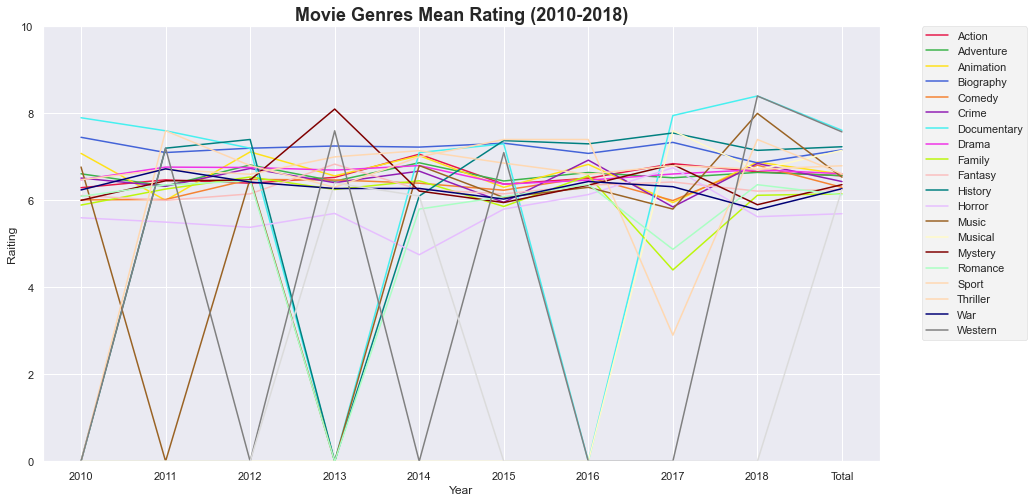

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams







data = df_final_raiting   
rcParams['figure.figsize'] = 15,8






genres = ['year','Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci_Fi', 'Sport',
       'Thriller', 'War', 'Western']



plt.plot(data.year, data.Action, color= '#e6194b' )
plt.plot(data.year,data.Adventure, color= '#3cb44b')
plt.plot(data.year,data.Animation, color= '#ffe119' )
plt.plot(data.year,data.Biography, color= '#4363d8' )
plt.plot(data.year,data.Comedy, color= '#f58231')
plt.plot(data.year,data.Crime, color= '#911eb4')
plt.plot(data.year,data.Documentary, color= '#46f0f0')
plt.plot(data.year,data.Drama, color= '#f032e6')
plt.plot(data.year,data.Family, color= '#bcf60c' )
plt.plot(data.year,data.Fantasy, color= '#fabebe' )
plt.plot(data.year,data.History, color= '#008080')
plt.plot(data.year,data.Horror, color= '#e6beff')
plt.plot(data.year,data.Music, color= '#9a6324')
plt.plot(data.year,data.Musical, color= '#fffac8')
plt.plot(data.year,data.Mystery, color= '#800000')
plt.plot(data.year,data.Romance, color= '#aaffc3')
plt.plot(data.year,data.Sci_Fi, color= '#ffd8b1')
plt.plot(data.year,data.Sport, color= '#ffd8b1')
plt.plot(data.year,data.Thriller, color= '#000075' )
plt.plot(data.year,data.War, color= '#808080')
plt.plot(data.year,data.Western, color= '#dbdbdb')



plt.grid(True)
plt.title('Movie Genres Mean Rating (2010-2018)', fontsize=18, fontweight= 'bold')


plt.xticks(data.year)
plt.ylim(0,10)
plt.style.use('fivethirtyeight')


plt.xlabel('Year')
plt.ylabel('Raiting')

plt.legend(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sport',
       'Thriller', 'War', 'Western'], loc='upper left', borderaxespad=0, bbox_to_anchor=(1.05, 1))

plt.show()

## Ratings mean per year of each genre in the period 2010-2018
### Highlight of each genre rating per year.

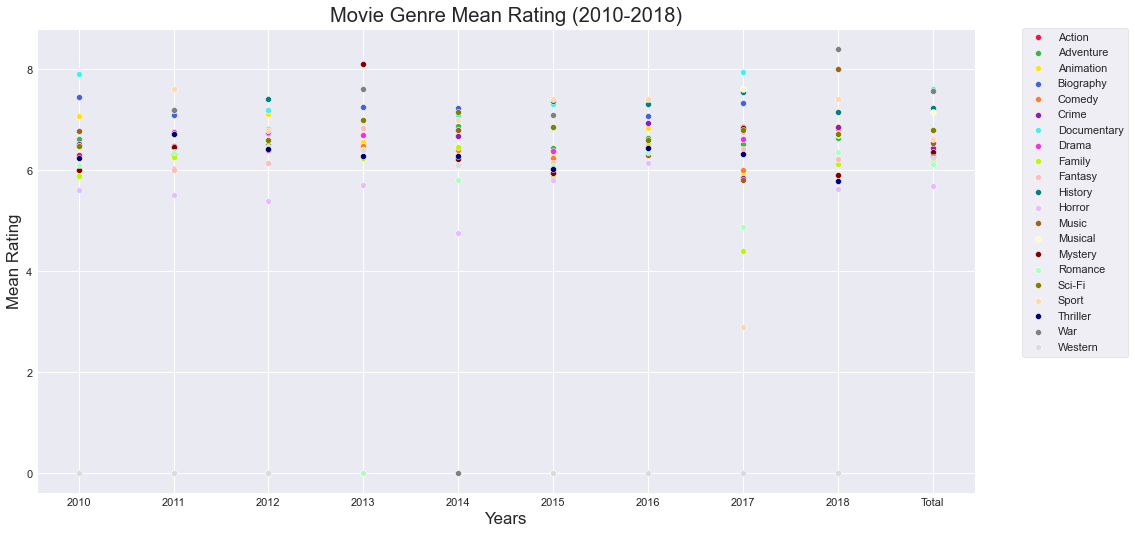

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = df_final_raiting



genres = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci_Fi', 'Sport',
       'Thriller', 'War', 'Western']




sns.set_style('darkgrid')


sns.scatterplot(x='year', y='Action' , data=df, color= '#e6194b');
sns.scatterplot(x='year', y='Adventure', data=df, color= '#3cb44b');
sns.scatterplot(x='year', y='Animation', data=df, color= '#ffe119');
sns.scatterplot(x='year', y='Biography', data=df, color= '#4363d8');
sns.scatterplot(x='year', y='Comedy', data=df, color= '#f58231');
sns.scatterplot(x='year', y='Crime', data=df, color= '#911eb4');
sns.scatterplot(x='year', y='Documentary', data=df, color= '#46f0f0');
sns.scatterplot(x='year', y='Drama', data=df, color= '#f032e6');
sns.scatterplot(x='year', y='Family', data=df, color= '#bcf60c'); 
sns.scatterplot(x='year', y='Fantasy', data=df, color= '#fabebe');
sns.scatterplot(x='year', y='History', data=df, color= '#008080');
sns.scatterplot(x='year', y='Horror', data=df, color= '#e6beff');
sns.scatterplot(x='year', y='Music', data=df, color= '#9a6324');
sns.scatterplot(x='year', y='Musical', data=df, color= '#fffac8');
sns.scatterplot(x='year', y='Mystery', data=df, color= '#800000');
sns.scatterplot(x='year', y='Romance', data=df, color= '#aaffc3');
sns.scatterplot(x='year', y='Sci_Fi', data=df, color= '#808000');
sns.scatterplot(x='year', y='Sport', data=df, color= '#ffd8b1');
sns.scatterplot(x='year', y='Thriller', data=df, color= '#000075');
sns.scatterplot(x='year', y='War', data=df, color= '#808080');
sns.scatterplot(x='year', y='Western', data=df, color= '#dbdbdb');




plt.title('Movie Genre Mean Rating (2010-2018)')
plt.xlabel('Years')
plt.ylabel('Mean Rating')
plt.legend(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'], loc='upper left', borderaxespad=0, bbox_to_anchor=(1.05, 1))
plt.show()


### All movie ratings per year of each genre in the period of 2010-2018 




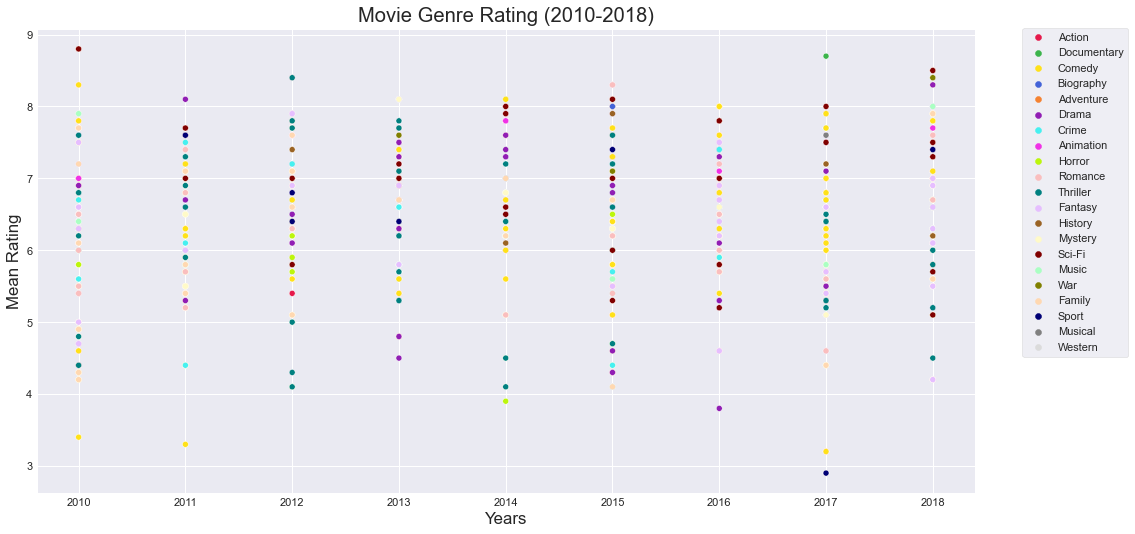

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



df = dgf

sns.set_style('darkgrid')


#Plotting chart and specifying colour values
sns.scatterplot(x='year', y='averagerating', hue='genres', data=df, 
                palette=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#dbdbdb']);

#Placing the legend outside of the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


#Labelling the chart
plt.title('Movie Genre Rating (2010-2018)')
plt.xlabel('Years')
plt.ylabel('Mean Rating')
plt.show()

In [102]:
# LOC ONLY GENRES AND MEAN RAITINGS
genres_raiting_mean = dgf_final.loc[:,  ["Total"]]

#DROPPING TOTAL IN ROW 12
genres_raiting_mean = genres_raiting_mean.drop(genres_raiting_mean.index[12])

In [103]:
genres_raiting_mean

year,Total
genres,
Documentary,7.611111
War,7.575000
History,7.233333
Biography,7.161538
Musical,7.150000
Sci-Fi,6.796154
Drama,6.612429
Sport,6.609091
Animation,6.603030


In [104]:
#SAVING DATA FRAME AS A MAIN_DATA.CSV FILE

genres_raiting_mean.to_csv("/Users/christopherfreyre/Documents/Academy Xi/Microsoft_project/dsc-phase-1-project/genres_raiting_mean.csv")



In [105]:

#BRINGIN BACK DATAFRAME FROM FOLDER

genres_raiting_mean = pd.read_csv("/Users/christopherfreyre/Documents/Academy Xi/Microsoft_project/dsc-phase-1-project/genres_raiting_mean.csv")


In [106]:
genres_raiting_mean

,genres,Total
0,Documentary,7.611111
1,War,7.575000
2,History,7.233333
3,Biography,7.161538
4,Musical,7.150000
5,Sci-Fi,6.796154
6,Drama,6.612429
7,Sport,6.609091
8,Animation,6.603030
9,Adventure,6.569543


In [107]:
#CONVERTING DATASET INTO A LIST OF DICTS

data1 = genres_raiting_mean.set_index('genres').to_dict()['Total']
data1

{'Documentary': 7.611111111111111,
 'War': 7.575,
 'History': 7.233333333333333,
 'Biography': 7.161538461538462,
 'Musical': 7.15,
 'Sci-Fi': 6.796153846153846,
 'Drama': 6.612429378531074,
 'Sport': 6.609090909090909,
 'Animation': 6.603030303030304,
 'Adventure': 6.5695431472081225,
 'Action': 6.564948453608247,
 'Music': 6.533333333333334,
 'Mystery': 6.362068965517241,
 'Comedy': 6.3,
 'Thriller': 6.268918918918919,
 'Fantasy': 6.250909090909091,
 'Western': 6.25,
 'Family': 6.151923076923077,
 'Romance': 6.130188679245283,
 'Horror': 5.693333333333333}

In [108]:
#ADDING VARIABLES TO INDIVIDUAL KEYS AND VALUES TO PLOT IN GRAPH LATER

group_data1 = list(data1.values())
group_names1 = list(data1.keys())


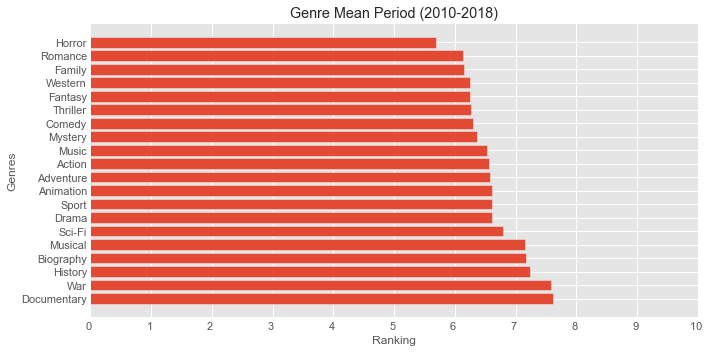

In [109]:
#PLOTING GRAPH RELATED TO STUDIOS DOMESTIC GROSS PERFOMANCE IN PERIOD 2010-2018


def format_number(group_data, indx):
    if group_data >= 0:
        formatter = '{:1.0f} '.format(group_data)
    return formatter
    
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(group_names1, group_data1)

step_value = 0

plt.xticks(np.arange(0, 11))


ax.set(xlabel='Ranking', ylabel='Genres',
       title='Genre Mean Period (2010-2018)')


ax.xaxis.set_major_formatter(format_number)

plt.tight_layout()
plt.savefig("Genre-mean_top_studios.png")
plt.show()
